# The Sparks Foundation

GRIP-Data Science and Business Analytics-November 2022

Task- Exploratory Data Analysis-Terrorism

Name : SHRUTHI K
 
 * Find out the hot zone of terrorism.
 * What all security issues and insights you can derive by EDA?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import library to split the training-test sample
from sklearn.model_selection import train_test_split

#import library for linear regression
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\user\Downloads\global_terrorism.csv",encoding="ISO-8859-1")

C:\Users\user\AppData\Local\Temp\ipykernel_8168\3077679134.py:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\user\Downloads\global_terrorism.csv",encoding="ISO-8859-1")


In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
df.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'Country','provstate':'state','region_txt':'Region','attacktype1_txt':'Attacktype','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'weapontype','motive':'Motive'},inplace=True)

In [6]:
df=df[['year','month','day','Country','state','Region','city','latitude','longitude','Attacktype','Target','Killed','Summary','Wounded','Group','Target_type','weapontype','Motive']]

In [7]:
df.head()

,year,month,day,Country,state,Region,city,latitude,longitude,Attacktype,Target,Killed,Summary,Wounded,Group,Target_type,weapontype,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,NaN,0.0,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,NaN,0.0,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,NaN,0.0,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [8]:
df.shape

(181691, 18)

In [9]:
#check data type
df.dtypes

year             int64
month            int64
day              int64
Country         object
state           object
Region          object
city            object
latitude       float64
longitude      float64
Attacktype      object
Target          object
Killed         float64
Summary         object
Wounded        float64
Group           object
Target_type     object
weapontype      object
Motive          object
dtype: object

In [10]:
df.describe()

,year,month,day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [11]:
#check missing values
df.isnull().sum()

year                0
month               0
day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
Attacktype          0
Target            636
Killed          10313
Summary         66129
Wounded         16311
Group               0
Target_type         0
weapontype          0
Motive         131130
dtype: int64

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Killed'}>],
       [<AxesSubplot:title={'center':'Wounded'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

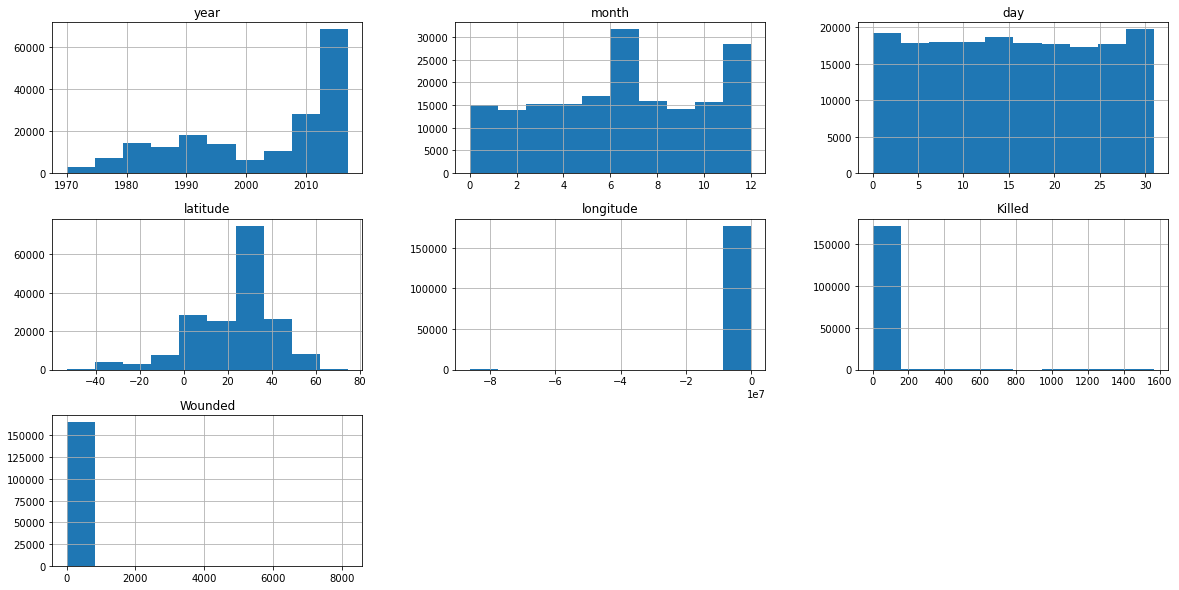

In [12]:
df.hist(figsize=(20,10)) # this represnt the distibtion of data on each series in the dataframe

In [13]:
#Print correlation plot of numeric columns
#Check the correlation of numeric variables
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,year,month,day,latitude,longitude,Killed,Wounded
0,1970,7,2,18.456792,-69.951164,1.0,0.0
1,1970,0,0,19.371887,-99.086624,0.0,0.0
2,1970,1,0,15.478598,120.599741,1.0,0.0
3,1970,1,0,37.997490,23.762728,NaN,NaN
4,1970,1,0,33.580412,130.396361,NaN,NaN


In [14]:
# correlation matrix
cor_mat = df_numeric.corr()
cor_mat

,year,month,day,latitude,longitude,Killed,Wounded
year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


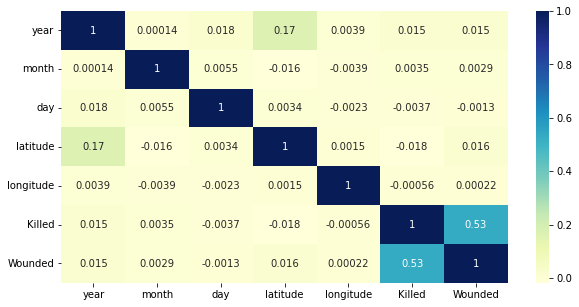

In [15]:
## plot correlations on a heatmap

# figure size
plt.figure(figsize=(10,5))

# heatmap
sns.heatmap(cor_mat, cmap="YlGnBu", annot=True) #YlGnBu
plt.show()

# Number of Terrorist Activities each Year

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of terrorist activiteseach year')

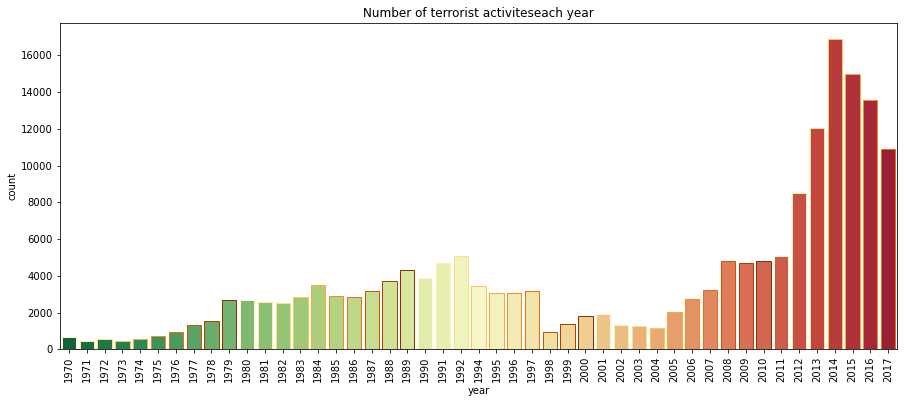

In [16]:
plt.subplots(figsize=(15,6))
sns.countplot("year",data=df,palette='RdYlGn_r',edgecolor=sns.color_palette("YlOrBr",10))
plt.xticks(rotation=90)
plt.title("Number of terrorist activiteseach year")

# Hot zone of terrorism

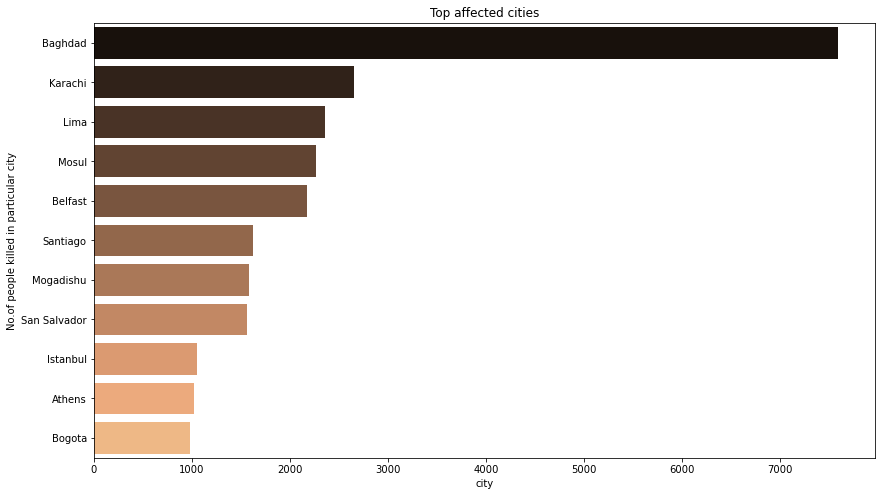

In [17]:
plt.subplots(figsize=(14,8))
sns.barplot(y=df['city'].value_counts()[1:12].index,x=df['city'].value_counts()[1:12].values,palette="copper")
plt.title("Top affected cities")
plt.xlabel('city')
plt.ylabel('No.of people killed in particular city')
plt.show()

# Terrorist  Activities by Region in each Year through Area plot

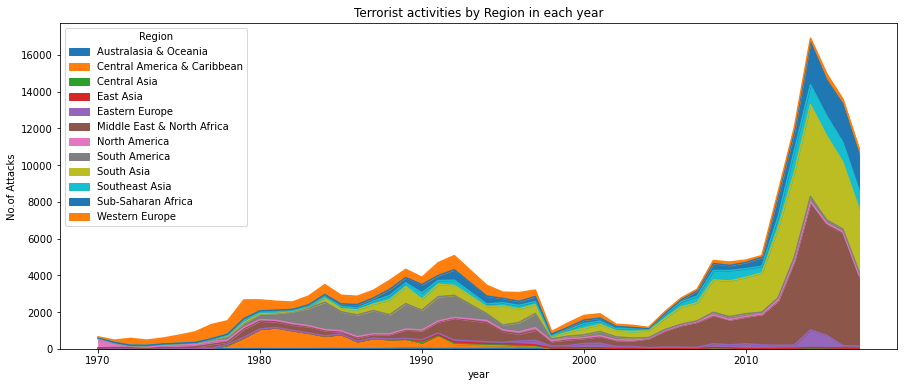

In [18]:
pd.crosstab(df.year,df.Region).plot(kind="area",figsize=(15,6))
plt.title("Terrorist activities by Region in each year")
plt.ylabel('No.of Attacks')
plt.show()

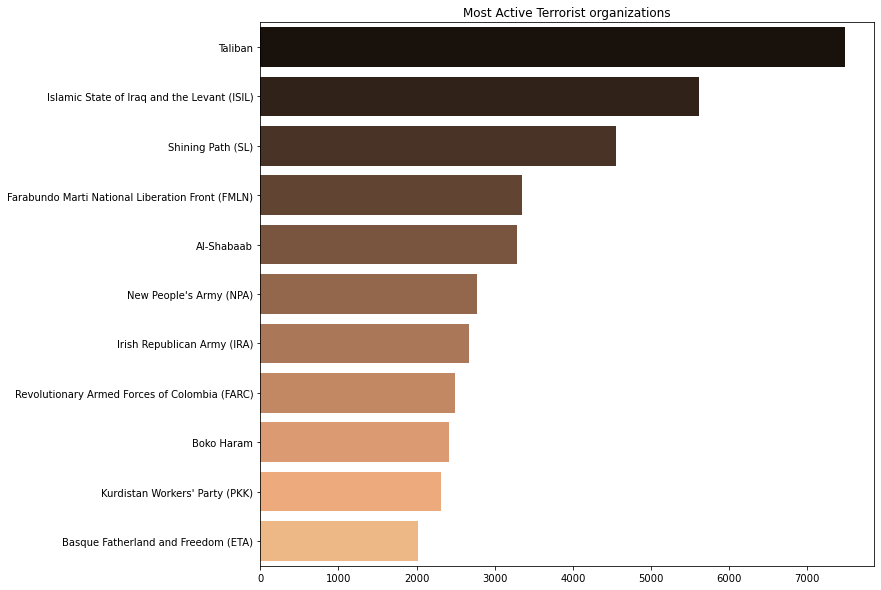

In [20]:
plt.subplots(figsize=(11,10))
sns.barplot(y=df['Group'].value_counts()[1:12].index,x=df['Group'].value_counts()[1:12].values,palette="copper")
plt.title("Most Active Terrorist organizations")
plt.show()

Text(0, 0.5, 'No of people killed')

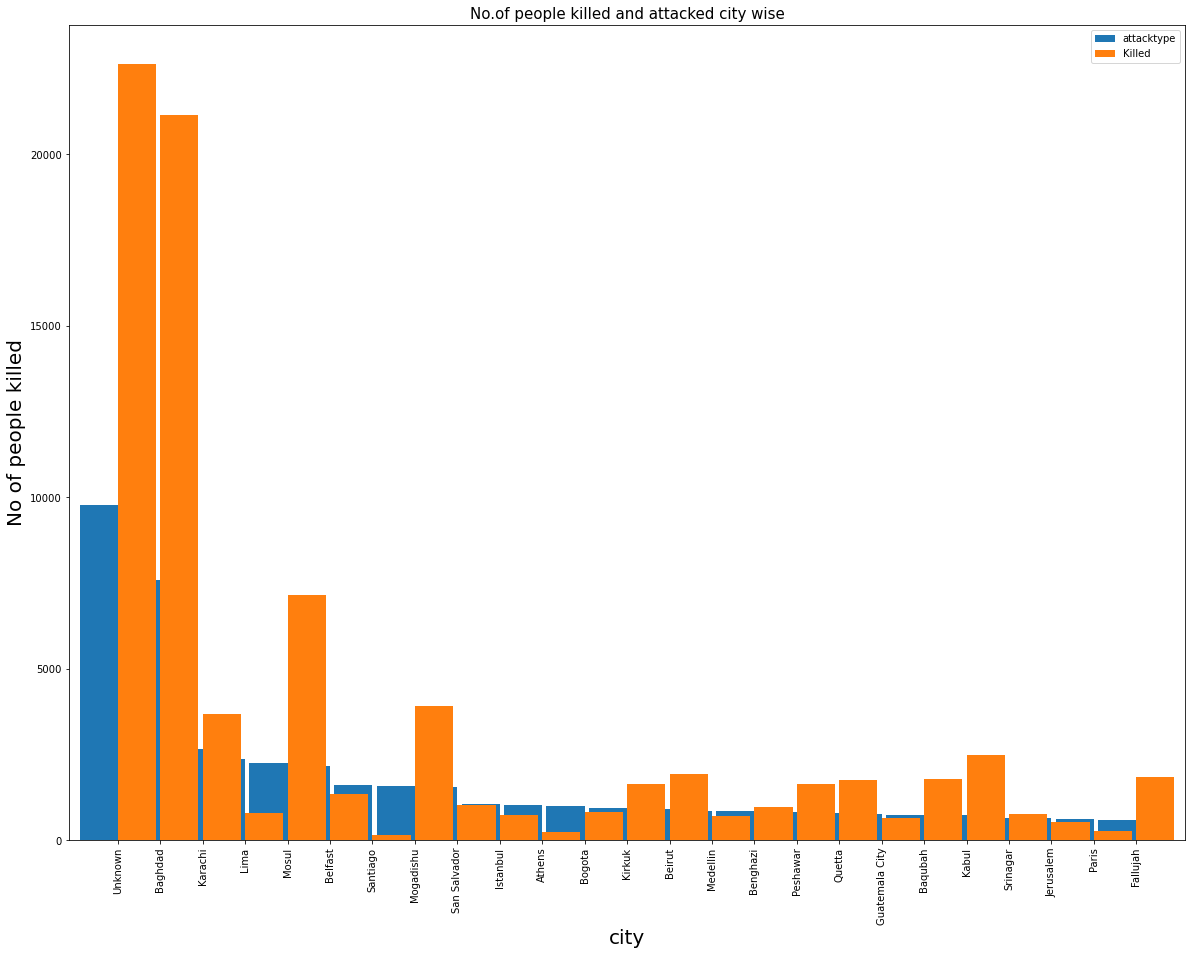

In [27]:
count_df=df['city'].value_counts().drop('unknown').head(25).to_frame()
count_df.columns=['attacktype']
count_Killed=df.groupby('city')['Killed'].sum().to_frame()
count_df.merge(count_Killed,left_index=True,right_index=True,how='left').plot.bar(width=1.8)
fig=plt.gcf()
fig.set_size_inches(20,15)
plt.title('No.of people killed and attacked city wise',fontsize=15)
plt.xlabel('city',fontsize=20)
plt.ylabel('No of people killed',fontsize=20)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


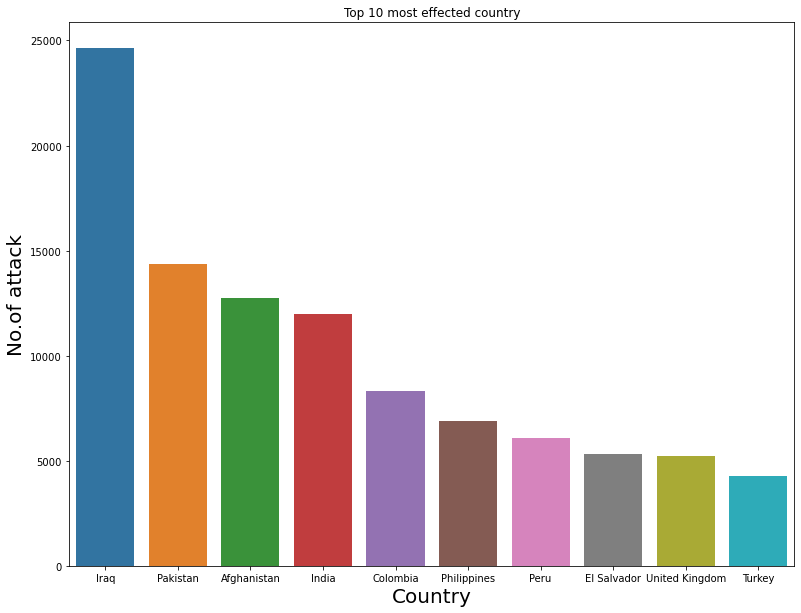

In [23]:
# Top affected countries
plt.figure(figsize=(13,10))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values,palette="tab10")
plt.title("Top 10 most effected country")
plt.xlabel('Country',fontsize=20)
plt.ylabel('No.of attack',fontsize=20)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


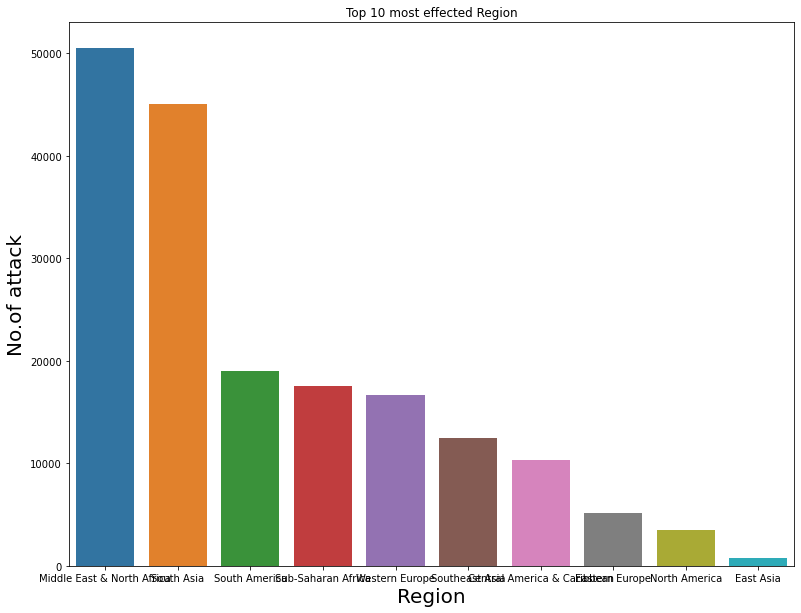

In [31]:
plt.figure(figsize=(13,10))
sns.barplot(df['Region'].value_counts()[:10].index,df['Region'].value_counts()[:10].values,palette="tab10")
plt.title("Top 10 most effected Region")
plt.xlabel('Region',fontsize=20)
plt.ylabel('No.of attack',fontsize=20)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


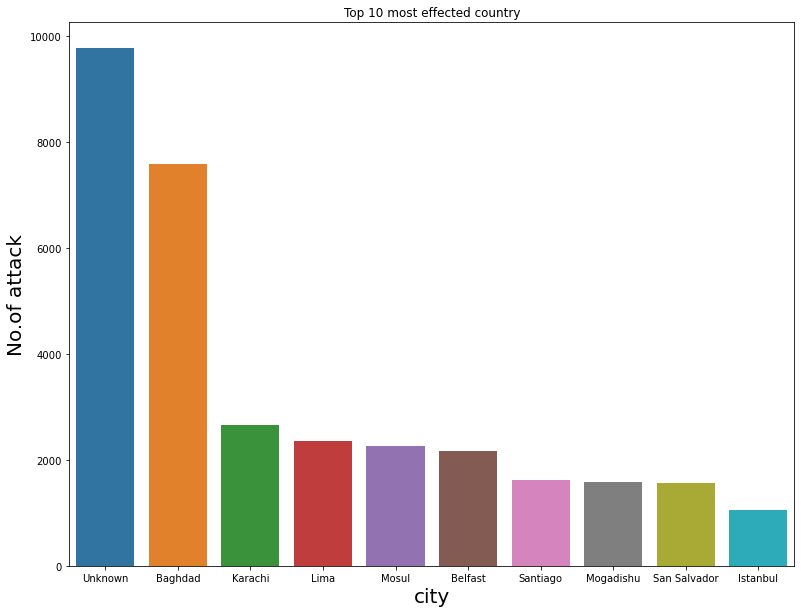

In [34]:
# Top affected countries
plt.figure(figsize=(13,10))
sns.barplot(df['city'].value_counts()[:10].index,df['city'].value_counts()[:10].values,palette="tab10")
plt.title("Top 10 most effected country")
plt.xlabel('city',fontsize=20)
plt.ylabel('No.of attack',fontsize=20)
plt.show()

In [ ]:
# Top 5 weapons used by terrorist

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


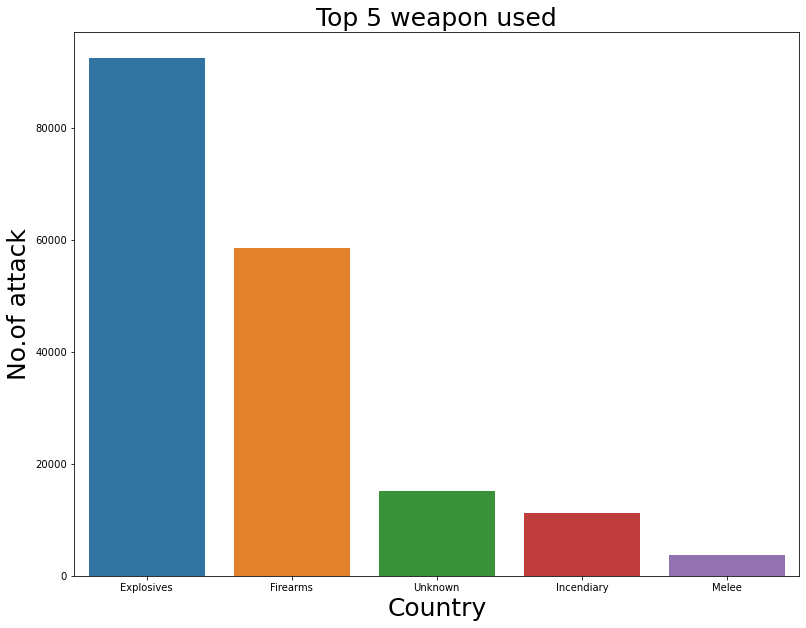

In [26]:
plt.figure(figsize=(13,10))
sns.barplot(df['weapontype'].value_counts()[:5].index,df['weapontype'].value_counts()[:5].values,palette="tab10")
plt.title("Top 5 weapon used",fontsize=25)
plt.xlabel('Country',fontsize=25)
plt.ylabel('No.of attack',fontsize=25)
plt.show()

# Conclusion:

* Number of attacks increased after the year 2004 and 2014 has the largest number of attacks
* Country with the most attacks:Iraq
* Region with the most attacks: Middle east & North Africa
* City wise most number of people killed and attacked : Baghdad
* Group with the most attacks :Taliban
* Most used Weapons:Explosives